In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from dataprep.eda import create_report

In [4]:
df = pd.read_csv('../../data/telecom_churn_me.csv')
df = df.drop(columns = ["Unnamed: 0"])
df

,PTY_PROFILE_SUB_TYPE,SOCIO_ECONOMIC_SEGMENT,PARTY_NATIONALITY,PARTY_GENDER_CD,TARGET,YEAR_JOINED,CURRENT_YEAR,BILL_AMOUNT,PAID_AMOUNT,PAYMENT_TRANSACTIONS,...,MOUS_FROM_LOCAL_MOBILES,MOUS_TO_LOCAL_LANDLINES,MOUS_FROM_LOCAL_LANDLINES,MOUS_TO_INT_NUMBER,MOUS_FROM_INT_NUMBER,DATA_IN_BNDL,DATA_OUT_BNDL,DATA_USG_PAYG,COMPLAINTS,Years_stayed
0,Residential,EMIRATI,United Arab Emirates,M,0,1994,2019,931.208938,812.175000,1,...,35.850,34.015,72.075,141.840,56.115,11944.079102,0.0,0.0,0,25
1,Prestige,EMIRATI,United Arab Emirates,M,0,1994,2019,431.082618,486.500000,1,...,10.595,7.715,11.750,5.110,0.000,9903.157715,0.0,0.0,0,25
2,Residential,EMIRATI,United Arab Emirates,M,0,1994,2019,50.619644,52.815000,1,...,0.000,0.000,0.000,0.000,0.000,0.102539,0.0,0.0,0,25
3,Prestige,EMIRATI,United Arab Emirates,M,0,1994,2019,399.710034,422.235000,1,...,158.500,2.670,15.965,0.000,0.000,3600.322266,0.0,0.0,0,25
4,Residential,EMIRATI,United Arab Emirates,M,0,1994,2019,612.665844,825.888333,1,...,186.050,17.515,28.685,3.235,4.475,3852.026367,0.0,0.0,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140599,Residential,EMIRATI,United Arab Emirates,M,0,2017,2019,297.752650,313.950000,1,...,0.000,0.000,0.000,0.000,0.000,307945.957031,0.0,0.0,0,2
1140600,Residential,YOUTH,United Arab Emirates,M,0,2017,2019,160.663773,178.500000,1,...,0.000,0.000,0.000,0.000,0.000,22647.873535,0.0,0.0,0,2
1140601,Consumer via Retailer,EXPATS,Comoros,M,0,2017,2019,570.147016,642.911667,1,...,64.990,3.660,10.050,0.000,0.000,17582.867188,0.0,0.0,0,2
1140602,Residential,EXPATS,Philippines,M,0,2017,2019,452.736799,525.413333,2,...,102.075,54.065,7.980,5.350,0.065,3015.338867,0.0,0.0,0,2


In [5]:
# Obtiene una lista con las columnas categoricas a partir de una diferencia de conjuntos
def getCategoricalColumns(df):
    cols = set(df.columns)
    numColumns = set(df._get_numeric_data().columns)
    
    return list(cols - numColumns)

In [6]:
categoricalColumns = getCategoricalColumns(df)
categoricalColumns

['PARTY_NATIONALITY',
 'STATUS',
 'PARTY_GENDER_CD',
 'SOCIO_ECONOMIC_SEGMENT',
 'PTY_PROFILE_SUB_TYPE']

In [7]:
# Convierte las variables categoricas en numericas en base a label encoding
def getNumericDataset(df):
    categoricalColumns = getCategoricalColumns(df)
    numDataset = df.drop(columns= categoricalColumns)
    categoricalDataset = df[categoricalColumns]

    categoricalDataset = categoricalDataset.apply(LabelEncoder().fit_transform)
    
    for i in categoricalColumns:
        numDataset[i] = categoricalDataset[i]
    
    return numDataset

In [8]:
df = getNumericDataset(df)
df

,TARGET,YEAR_JOINED,CURRENT_YEAR,BILL_AMOUNT,PAID_AMOUNT,PAYMENT_TRANSACTIONS,PARTY_REV,PREPAID_LINES,POSTPAID_LINES,OTHER_LINES,...,DATA_IN_BNDL,DATA_OUT_BNDL,DATA_USG_PAYG,COMPLAINTS,Years_stayed,PARTY_NATIONALITY,STATUS,PARTY_GENDER_CD,SOCIO_ECONOMIC_SEGMENT,PTY_PROFILE_SUB_TYPE
0,0,1994,2019,931.208938,812.175000,1,5968.700000,2,6,2,...,11944.079102,0.0,0.0,0,25,179,0,1,0,2
1,0,1994,2019,431.082618,486.500000,1,6245.141667,6,4,2,...,9903.157715,0.0,0.0,0,25,179,0,1,0,1
2,0,1994,2019,50.619644,52.815000,1,1666.488333,2,3,1,...,0.102539,0.0,0.0,0,25,179,0,1,0,2
3,0,1994,2019,399.710034,422.235000,1,2522.008333,3,4,3,...,3600.322266,0.0,0.0,0,25,179,0,1,0,1
4,0,1994,2019,612.665844,825.888333,1,1219.961667,0,2,1,...,3852.026367,0.0,0.0,0,25,179,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140599,0,2017,2019,297.752650,313.950000,1,2418.486667,5,4,3,...,307945.957031,0.0,0.0,0,2,179,0,1,0,2
1140600,0,2017,2019,160.663773,178.500000,1,454.116667,0,1,1,...,22647.873535,0.0,0.0,0,2,179,0,1,2,2
1140601,0,2017,2019,570.147016,642.911667,1,615.866667,1,1,0,...,17582.867188,0.0,0.0,0,2,39,0,1,1,0
1140602,0,2017,2019,452.736799,525.413333,2,735.645000,1,2,0,...,3015.338867,0.0,0.0,0,2,136,0,1,1,2


In [9]:
df.to_csv('../../data/telcom_numeric.csv')

In [19]:
XSet = df.drop(columns=['TARGET'])

In [20]:
n = len(list(XSet.columns))

In [34]:
import numpy as np

In [35]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

In [36]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [37]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(XSet)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [38]:
indexList = []
for i in range(1,n+1):
    indexList.append('PC' + str(i))

In [39]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = XSet.columns,
    index   = indexList
)

,YEAR_JOINED,CURRENT_YEAR,BILL_AMOUNT,PAID_AMOUNT,PAYMENT_TRANSACTIONS,PARTY_REV,PREPAID_LINES,POSTPAID_LINES,OTHER_LINES,LINE_REV,...,DATA_IN_BNDL,DATA_OUT_BNDL,DATA_USG_PAYG,COMPLAINTS,Years_stayed,PARTY_NATIONALITY,STATUS,PARTY_GENDER_CD,SOCIO_ECONOMIC_SEGMENT,PTY_PROFILE_SUB_TYPE
PC1,-0.134007,0.058733,4.953947e-01,4.986119e-01,1.155396e-01,-1.104542e-02,-1.031230e-02,-2.673005e-02,-1.896743e-02,4.974119e-01,...,3.284645e-02,1.914384e-02,2.296823e-02,5.578904e-02,0.135677,7.789225e-02,-3.616025e-02,-5.560181e-03,-6.483642e-02,-1.956017e-01
PC2,-0.076985,-0.008573,1.184887e-02,1.005633e-02,-2.163725e-02,5.346902e-01,3.876789e-01,5.493805e-01,4.615680e-01,1.015329e-02,...,-2.164171e-03,-1.183598e-03,5.942406e-03,-1.531047e-02,0.076395,1.000704e-01,-8.951247e-03,1.248086e-01,-8.538076e-02,2.206206e-02
PC3,0.560624,-0.097427,7.008470e-02,6.823109e-02,1.197023e-01,1.050836e-01,2.199999e-02,1.084406e-01,7.879324e-02,7.613489e-02,...,8.621238e-02,9.575017e-03,-2.533601e-02,8.321619e-02,-0.562182,-2.591423e-01,2.545299e-02,-3.395660e-03,3.774298e-01,-1.424391e-01
PC4,-0.227791,0.072484,-1.282902e-01,-1.266351e-01,-4.906248e-03,5.012989e-02,-7.169638e-02,4.874677e-02,4.183370e-02,-1.334634e-01,...,-2.246370e-01,-2.245357e-02,-9.342127e-03,3.351217e-02,0.229629,-4.029863e-01,-1.562350e-01,4.927907e-02,2.213287e-01,7.088037e-02
PC5,0.157926,0.058201,-1.332706e-01,-1.365754e-01,3.403902e-02,-1.703987e-02,6.057628e-02,-9.002571e-03,-1.207596e-02,-1.263641e-01,...,-2.224872e-02,-2.281715e-02,-5.431199e-02,7.973377e-02,-0.155227,2.381021e-01,-3.602962e-02,-1.856903e-01,-1.114606e-01,1.039759e-01
PC6,0.144512,-0.198331,4.234344e-02,3.799385e-02,-3.590861e-01,-4.247508e-02,7.769727e-02,-3.651797e-02,-4.746321e-02,3.904066e-02,...,1.847080e-01,4.393295e-02,3.654293e-02,-3.798577e-01,-0.151258,2.739776e-01,1.197830e-01,2.024093e-02,-2.722807e-01,7.012200e-02
PC7,0.101212,0.414124,4.317635e-02,3.237707e-02,-3.809028e-01,7.548548e-02,-1.328999e-01,5.474675e-02,4.756056e-02,4.370041e-02,...,-1.196540e-01,5.923964e-02,-5.442417e-02,-4.073559e-01,-0.085680,3.876434e-03,-5.133847e-01,-3.230656e-01,4.015534e-02,2.259053e-02
PC8,0.016364,0.065805,4.317303e-03,1.170463e-02,1.207585e-01,7.141078e-02,-7.784809e-02,5.901029e-02,5.316395e-02,2.521251e-03,...,-5.732434e-01,1.908509e-01,1.785808e-01,-1.166845e-01,-0.013894,6.960235e-02,5.263208e-01,-4.927270e-01,-8.317202e-03,-1.310546e-01
PC9,-0.029274,-0.017956,-2.851088e-03,-1.541998e-03,5.371438e-02,-1.184041e-03,1.941851e-03,-9.265876e-04,3.444565e-03,-2.300843e-03,...,7.226498e-02,7.914038e-01,-5.934296e-01,7.346516e-02,0.028512,-7.418964e-03,1.019492e-02,1.291781e-04,-7.503070e-03,5.270285e-02
PC10,-0.002906,-0.039746,-2.499064e-02,-2.586600e-02,-3.495189e-02,-1.294228e-02,9.813167e-03,-9.827979e-03,-9.151772e-03,-1.924466e-02,...,1.256462e-01,5.677486e-01,7.728399e-01,5.664219e-02,0.001440,-4.972976e-02,-1.769386e-01,1.014884e-01,4.479370e-02,1.582573e-02


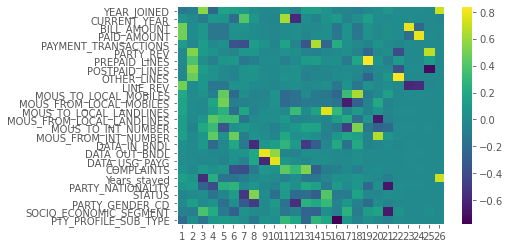

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=1)
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(XSet.columns)), XSet.columns)
plt.xticks(range(len(XSet.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[1.34835713e-01 1.12499569e-01 8.84631588e-02 6.10781982e-02
 5.02758222e-02 4.25019503e-02 4.08227294e-02 4.03462252e-02
 3.84151301e-02 3.82079090e-02 3.73497504e-02 3.63705871e-02
 3.51976619e-02 3.42516290e-02 3.33450697e-02 3.17236909e-02
 2.84443931e-02 2.71903602e-02 2.43169411e-02 2.25998629e-02
 2.06976342e-02 1.64975060e-02 2.24805171e-03 1.81574744e-03
 5.04708957e-04 1.17574875e-31]


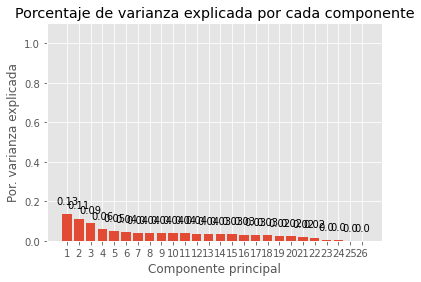

In [45]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(XSet.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.13483571 0.24733528 0.33579844 0.39687664 0.44715246 0.48965441
 0.53047714 0.57082337 0.6092385  0.64744641 0.68479616 0.72116674
 0.7563644  0.79061603 0.8239611  0.85568479 0.88412919 0.91131955
 0.93563649 0.95823635 0.97893399 0.99543149 0.99767954 0.99949529
 1.         1.        ]


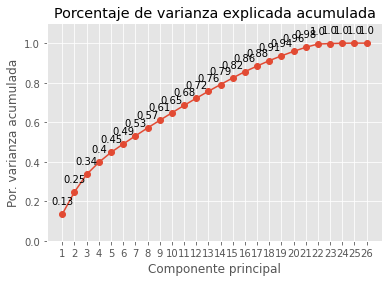

In [48]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(XSet.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(XSet.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [53]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=XSet)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = indexList,
    index   = XSet.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26
0,3.440054,0.961499,-3.802177,1.327331,-1.104101,0.602471,-0.077837,-0.430044,0.159535,-0.190206,...,0.557162,1.040979,-0.362680,0.206414,-0.176278,-0.016412,0.016675,-0.355589,0.057229,-7.010447e-15
1,1.295960,1.214165,-4.228933,0.299219,-1.252983,-0.225776,-0.355026,-0.240778,0.078865,-0.070348,...,0.121842,0.330402,0.314470,-0.152301,-0.165475,0.027515,-0.134416,-0.027545,0.202598,-7.029096e-15
2,-0.844469,0.746376,-4.832071,0.896217,-0.812832,-0.281003,-0.373878,-0.277677,0.162309,-0.012919,...,0.176650,0.401536,-0.245689,-0.087931,-0.301569,-0.049185,0.003132,-0.028533,-0.003130,-7.010447e-15
3,1.133226,0.960288,-4.309796,0.497486,-0.906660,-0.353291,-0.354681,-0.124789,0.047693,-0.053955,...,-0.059450,0.182730,-0.149796,-0.092798,-0.127909,0.162231,-0.023386,-0.005541,0.009075,-7.029096e-15
4,2.192465,0.641919,-4.405351,0.480443,-0.952219,-0.114523,-0.132347,-0.342478,0.144711,-0.083902,...,0.195568,-0.367600,-0.343909,-0.107661,-0.181763,-0.033117,-0.357309,0.173780,-0.078932,-7.010447e-15


In [58]:
# Recostruccion de las proyecciones
# ==============================================================================
recostruccion = pca_pipe.inverse_transform(proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = XSet.columns,
                    index   = XSet.index
)
print('------------------')
print('Valores originales')
print('------------------')
display(recostruccion.head())

print('---------------------')
print('Valores reconstruidos')
print('---------------------')
display(XSet.head())

------------------
Valores originales
------------------


,YEAR_JOINED,CURRENT_YEAR,BILL_AMOUNT,PAID_AMOUNT,PAYMENT_TRANSACTIONS,PARTY_REV,PREPAID_LINES,POSTPAID_LINES,OTHER_LINES,LINE_REV,...,DATA_IN_BNDL,DATA_OUT_BNDL,DATA_USG_PAYG,COMPLAINTS,Years_stayed,PARTY_NATIONALITY,STATUS,PARTY_GENDER_CD,SOCIO_ECONOMIC_SEGMENT,PTY_PROFILE_SUB_TYPE
0,1994.0,2019.0,931.208938,812.175000,1.0,5968.700000,2.0,6.0,2.0,945.040000,...,11944.079102,-7.494005e-15,-8.810730e-13,3.330669e-16,25.0,179.0,5.551115e-17,1.0,-2.220446e-16,2.0
1,1994.0,2019.0,431.082618,486.500000,1.0,6245.141667,6.0,4.0,2.0,493.815000,...,9903.157715,2.026157e-15,-4.121148e-12,-2.775558e-16,25.0,179.0,-7.771561e-16,1.0,3.330669e-16,1.0
2,1994.0,2019.0,50.619644,52.815000,1.0,1666.488333,2.0,3.0,1.0,50.300000,...,0.102539,-3.358425e-15,5.684342e-14,-1.665335e-16,25.0,179.0,-6.106227e-16,1.0,-1.110223e-16,2.0
3,1994.0,2019.0,399.710034,422.235000,1.0,2522.008333,3.0,4.0,3.0,406.586667,...,3600.322266,1.498801e-15,-2.643219e-12,-3.191891e-16,25.0,179.0,-7.771561e-16,1.0,4.440892e-16,1.0
4,1994.0,2019.0,612.665844,825.888333,1.0,1219.961667,0.0,2.0,1.0,751.185000,...,3852.026367,-3.774758e-15,6.536993e-13,0.000000e+00,25.0,179.0,-1.665335e-16,1.0,-1.110223e-16,2.0


---------------------
Valores reconstruidos
---------------------


,YEAR_JOINED,CURRENT_YEAR,BILL_AMOUNT,PAID_AMOUNT,PAYMENT_TRANSACTIONS,PARTY_REV,PREPAID_LINES,POSTPAID_LINES,OTHER_LINES,LINE_REV,...,DATA_IN_BNDL,DATA_OUT_BNDL,DATA_USG_PAYG,COMPLAINTS,Years_stayed,PARTY_NATIONALITY,STATUS,PARTY_GENDER_CD,SOCIO_ECONOMIC_SEGMENT,PTY_PROFILE_SUB_TYPE
0,1994,2019,931.208938,812.175000,1,5968.700000,2,6,2,945.040000,...,11944.079102,0.0,0.0,0,25,179,0,1,0,2
1,1994,2019,431.082618,486.500000,1,6245.141667,6,4,2,493.815000,...,9903.157715,0.0,0.0,0,25,179,0,1,0,1
2,1994,2019,50.619644,52.815000,1,1666.488333,2,3,1,50.300000,...,0.102539,0.0,0.0,0,25,179,0,1,0,2
3,1994,2019,399.710034,422.235000,1,2522.008333,3,4,3,406.586667,...,3600.322266,0.0,0.0,0,25,179,0,1,0,1
4,1994,2019,612.665844,825.888333,1,1219.961667,0,2,1,751.185000,...,3852.026367,0.0,0.0,0,25,179,0,1,0,2


In [62]:
dropPCA = list(XSet.columns)[18:]

In [63]:
df = df.drop(columns=dropPCA)
df

,TARGET,YEAR_JOINED,CURRENT_YEAR,BILL_AMOUNT,PAID_AMOUNT,PAYMENT_TRANSACTIONS,PARTY_REV,PREPAID_LINES,POSTPAID_LINES,OTHER_LINES,LINE_REV,MOUS_TO_LOCAL_MOBILES,MOUS_FROM_LOCAL_MOBILES,MOUS_TO_LOCAL_LANDLINES,MOUS_FROM_LOCAL_LANDLINES,MOUS_TO_INT_NUMBER,MOUS_FROM_INT_NUMBER,DATA_IN_BNDL,DATA_OUT_BNDL
0,0,1994,2019,931.208938,812.175000,1,5968.700000,2,6,2,945.040000,1004.070,35.850,34.015,72.075,141.840,56.115,11944.079102,0.0
1,0,1994,2019,431.082618,486.500000,1,6245.141667,6,4,2,493.815000,159.050,10.595,7.715,11.750,5.110,0.000,9903.157715,0.0
2,0,1994,2019,50.619644,52.815000,1,1666.488333,2,3,1,50.300000,0.000,0.000,0.000,0.000,0.000,0.000,0.102539,0.0
3,0,1994,2019,399.710034,422.235000,1,2522.008333,3,4,3,406.586667,288.805,158.500,2.670,15.965,0.000,0.000,3600.322266,0.0
4,0,1994,2019,612.665844,825.888333,1,1219.961667,0,2,1,751.185000,209.760,186.050,17.515,28.685,3.235,4.475,3852.026367,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140599,0,2017,2019,297.752650,313.950000,1,2418.486667,5,4,3,303.166667,0.000,0.000,0.000,0.000,0.000,0.000,307945.957031,0.0
1140600,0,2017,2019,160.663773,178.500000,1,454.116667,0,1,1,170.000000,0.000,0.000,0.000,0.000,0.000,0.000,22647.873535,0.0
1140601,0,2017,2019,570.147016,642.911667,1,615.866667,1,1,0,609.630000,154.150,64.990,3.660,10.050,0.000,0.000,17582.867188,0.0
1140602,0,2017,2019,452.736799,525.413333,2,735.645000,1,2,0,414.840000,218.805,102.075,54.065,7.980,5.350,0.065,3015.338867,0.0


In [64]:
df.to_csv('../../data/telecom_pca.csv') 